## Espacio de Probabilidad

Este notebook está basado en el enfoque del libro de Luis Rincón y se enfoca en los tres enfoques fundamentales para entender la probabilidad: clásico (laplaciano), geométrico y frecuentista. Además, se incluyen ejercicios prácticos y ejemplos con conjuntos.

## 1. Enfoque Clásico (Laplaciano)

La probabilidad clásica se basa en el supuesto de que todos los resultados del espacio muestral son igualmente probables.

### #Definiciones básicas

- **Espacio muestral (Ω):** conjunto de todos los posibles resultados de un experimento aleatorio.
- **Evento (A):** subconjunto de Ω.
- **Probabilidad de un evento A:**

$$P(A) = \frac{|A|}{|\Omega|}$$

- **Ejemplo: Lanzamiento de un dado**

$$\Omega = \{1, 2, 3, 4, 5, 6\}, \quad A = \{2, 4, 6\} \Rightarrow P(A) = \frac{3}{6} = \frac{1}{2}$$

In [ ]:
import random

# Espacio muestral
omega = [1, 2, 3, 4, 5, 6]

# Evento A: número par
evento_A = [x for x in omega if x % 2 == 0]

# Probabilidad clásica (laplaciana)
prob_A = len(evento_A) / len(omega)

print(f"Ω = {omega}")
print(f"A = {evento_A}")
print(f"P(A) = {prob_A}")

Ω = [1, 2, 3, 4, 5, 6]
A = [2, 4, 6]
P(A) = 0.5


### Probabilidad condicional

$$P(A \mid B) = \frac{P(A \cap B)}{P(B)}, \quad \text{si } P(B) > 0$$


### Independencia

Dos eventos A y B son independientes si:

$$P(A \cap B) = P(A) \cdot P(B)$$

### Uso de conjuntos en probabilidad clásica

- Unión: $$A \cup B$$
- Intersección: $$A \cap B$$
- Complemento: $$A^c = \Omega \setminus A$$
- Diferencia simétrica: $$A \triangle B = (A \cup B) \setminus (A \cap B)$$

#### Ejercicio 1:

Lanzamos un dado justo. Sean los eventos:

- A = "Número par"
- B = "Número mayor que 3"

1. Determina $$A,  B, A \cap B, A \cup B, A^c$$
2. Calcula $$P(A), P(B), P(A \cap B), P(A \cup B)$$

#### Solución al Ejercicio 1:

**Dado el espacio muestral:**

$$\Omega = \{1, 2, 3, 4, 5, 6\}$$

**Se determina**
\begin{align*}
A &= \{2, 4, 6\} \quad \text{(Números pares)} \\
B &= \{4, 5, 6\} \quad \text{(Números > 3)} \\
A \cap B &= \{4, 6\} \\
A \cup B &= \{2, 4, 5, 6\} \\
A^c &= \{1, 3, 5\} \quad \text{(Complemento de A)}
\end{align*}

**Calculamos**
\begin{align*}
P(A) &= \frac{|A|}{|\Omega|} = \frac{3}{6} = 0.5 \\
P(B) &= \frac{|B|}{|\Omega|} = \frac{3}{6} = 0.5 \\
P(A \cap B) &= \frac{|A \cap B|}{|\Omega|} = \frac{2}{6} \approx 0.333 \\
P(A \cup B) &= P(A) + P(B) - P(A \cap B) = 0.5 + 0.5 - 0.333 \approx 0.666 \\
&= \frac{|A \cup B|}{|\Omega|} = \frac{4}{6} \approx 0.666 \quad \text{(Verificación)}
\end{align*}

In [ ]:
from fractions import Fraction

omega = {1, 2, 3, 4, 5, 6}
A = {2, 4, 6}
B = {4, 5, 6}

print(f"P(A) = {Fraction(len(A), len(omega))} = {len(A)/len(omega):.3f}")
print(f"P(B) = {Fraction(len(B), len(omega))} = {len(B)/len(omega):.3f}")
print(f"P(A ∩ B) = {Fraction(len(A&B), len(omega))} ≈ {len(A&B)/len(omega):.3f}")
print(f"P(A ∪ B) = {Fraction(len(A|B), len(omega))} ≈ {len(A|B)/len(omega):.3f}")

P(A) = 1/2 = 0.500
P(B) = 1/2 = 0.500
P(A ∩ B) = 1/3 ≈ 0.333
P(A ∪ B) = 2/3 ≈ 0.667


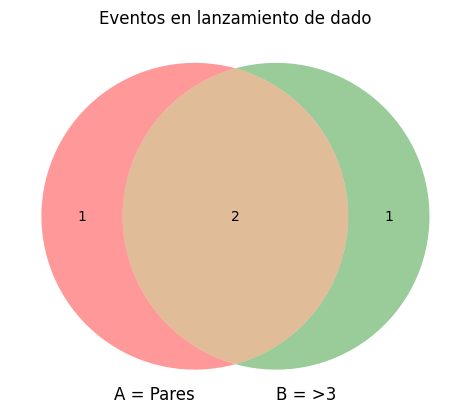

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

venn2(subsets=(len(A-B), len(B-A), len(A&B)),
      set_labels=('A = Pares', 'B = >3'))
plt.title("Eventos en lanzamiento de dado")
plt.show()

## 2. Enfoque Geométrico

Cuando el número de resultados posibles es infinito (por ejemplo, un intervalo continuo), usamos el enfoque geométrico.

### 🔸 Definición:

$$P(A) = \frac{\text{longitud (área, volumen) del evento A}}{\text{longitud (área, volumen) del espacio muestral}}$$

### 🔹 Ejemplo clásico: El problema del encuentro

Dos personas acuerdan reunirse entre las 12:00 y las 13:00. Cada una llega en un momento aleatorio y espera 15 minutos. ¿Cuál es la probabilidad de que se encuentren?

> Puedes representarlo como un cuadrado de 60×60 minutos, y las zonas favorables forman dos triángulos en las esquinas donde no se encontrarían.

La probabilidad de que se encuentren es:

$$P(\text{encuentro}) = \frac{7}{16}$$

In [ ]:
import numpy as np

N = 100000
tiempo_max = 60

# Generamos tiempos aleatorios para dos personas
persona1 = np.random.uniform(0, tiempo_max, N)
persona2 = np.random.uniform(0, tiempo_max, N)

# Se encuentran si la diferencia es <= 15
encuentros = np.abs(persona1 - persona2) <= 15
prob_encuentro = np.mean(encuentros)

print(f"Probabilidad estimada de encuentro: {prob_encuentro:.4f}")

Probabilidad estimada de encuentro: 0.4351


## 3. Enfoque Frecuentista

La probabilidad se define como el límite de la frecuencia relativa a medida que el número de ensayos tiende al infinito:

$$
P(A) = \lim_{n \to \infty} \frac{n_A}{n}
$$

donde \( n_A \) es el número de veces que ocurre el evento A en \( n \) repeticiones del experimento.

---

### 🔹 Ejemplo: Volado

> Simulamos lanzar una moneda justa muchas veces. El resultado debe converger hacia 0.5 para "cara".


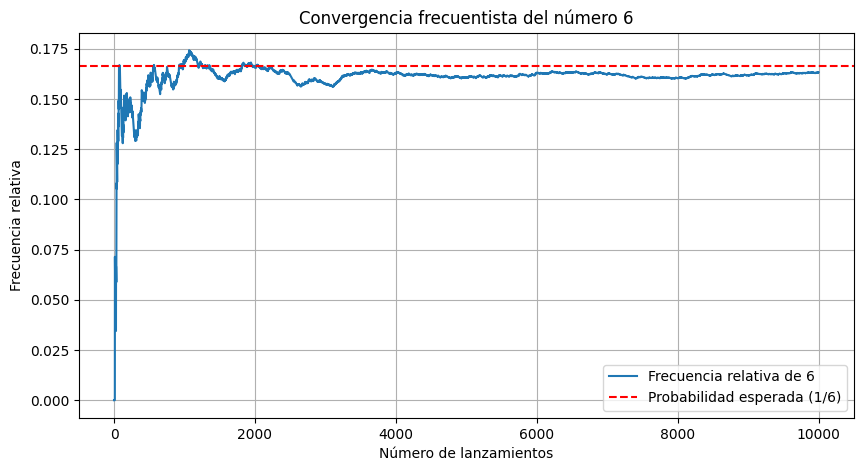

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
lanzamientos = np.random.randint(1, 7, size=n)
seis = np.cumsum(lanzamientos == 6)
prob_seis = seis / np.arange(1, n+1)

plt.figure(figsize=(10,5))
plt.plot(prob_seis, label='Frecuencia relativa de 6')
plt.axhline(1/6, color='red', linestyle='--', label='Probabilidad esperada (1/6)')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Frecuencia relativa')
plt.title('Convergencia frecuentista del número 6')
plt.legend()
plt.grid(True)
plt.show()